<a href="https://colab.research.google.com/github/biswa2005/ML-Learning/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Linear Regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('ford.csv')
df.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [5]:
df.shape

(17966, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [7]:
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


<Axes: xlabel='price', ylabel='Count'>

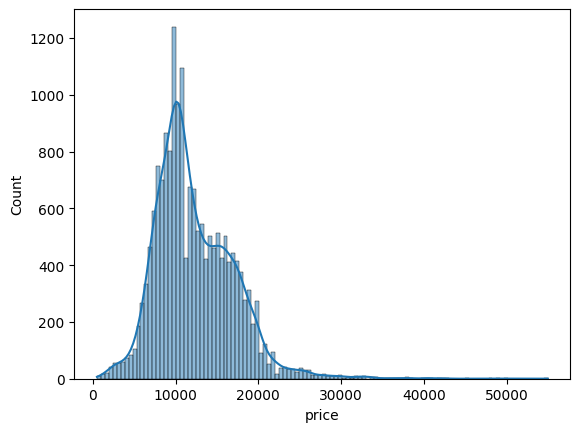

In [8]:
sns.histplot(df['price'], kde=True)

<Axes: >

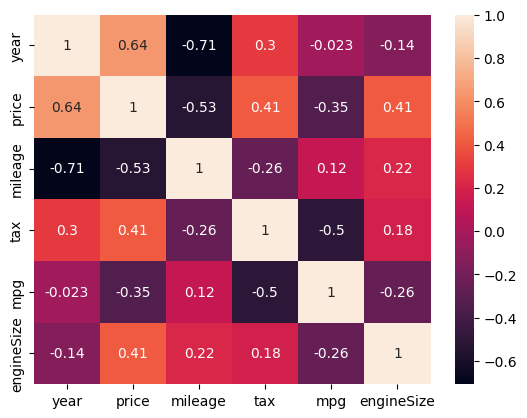

In [9]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, '1996'),
  Text(1, 0, '1998'),
  Text(2, 0, '2000'),
  Text(3, 0, '2002'),
  Text(4, 0, '2003'),
  Text(5, 0, '2004'),
  Text(6, 0, '2005'),
  Text(7, 0, '2006'),
  Text(8, 0, '2007'),
  Text(9, 0, '2008'),
  Text(10, 0, '2009'),
  Text(11, 0, '2010'),
  Text(12, 0, '2011'),
  Text(13, 0, '2012'),
  Text(14, 0, '2013'),
  Text(15, 0, '2014'),
  Text(16, 0, '2015'),
  Text(17, 0, '2016'),
  Text(18, 0, '2017'),
  Text(19, 0, '2018'),
  Text(20, 0, '2019'),
  Text(21, 0, '2020'),
  Text(22, 0, '2060')])

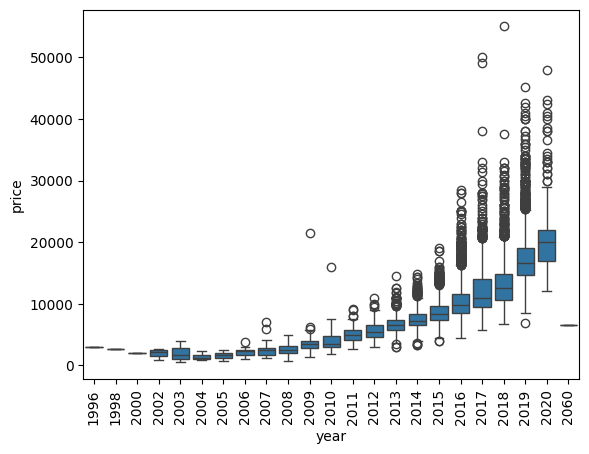

In [10]:
sns.boxplot(data=df, x='year', y='price')
plt.xticks(rotation = 90)


<Axes: xlabel='mileage', ylabel='price'>

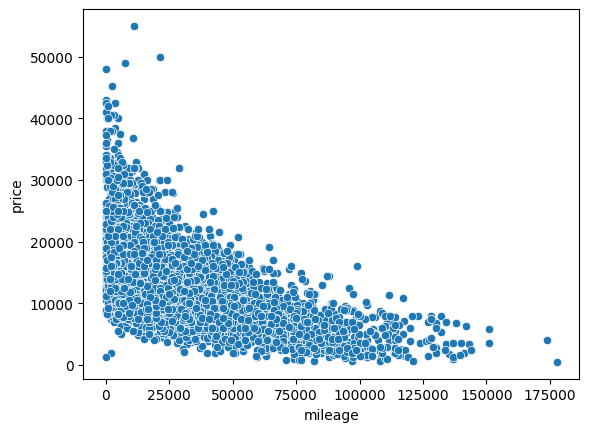

In [11]:
sns.scatterplot(data = df, x = 'mileage', y = 'price')

In [12]:
X = df.drop(columns=['price'], axis=1)
y = df['price']

In [13]:
X_One_Encode = pd.get_dummies(X, columns=['model', 'fuelType', 'transmission'], dtype='int64', drop_first=True)

In [14]:
X_One_Encode

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,transmission_Manual,transmission_Semi-Auto
0,2017,15944,150,57.7,1.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,2018,9083,150,57.7,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,2017,12456,150,57.7,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,2019,10460,145,40.3,1.5,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
4,2019,1482,145,48.7,1.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47.1,1.4,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
17962,2014,40700,30,57.7,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
17963,2015,7010,20,67.3,1.6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
17964,2018,5007,145,57.7,1.2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_cols = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
X_One_Encode[numeric_cols] = scaler.fit_transform(X_One_Encode[numeric_cols])

X_One_Encode

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,transmission_Manual,transmission_Semi-Auto
0,0.065128,-0.380998,0.591358,-0.020442,-0.811386,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.552866,-0.733359,0.591358,-0.020442,-0.811386,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0.065128,-0.560132,0.591358,-0.020442,-0.811386,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1.040605,-0.662640,0.510727,-1.738890,0.345070,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
4,1.040605,-1.123724,0.510727,-0.909294,-0.811386,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0.065128,-0.342172,0.591358,-1.067312,0.113779,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
17962,-1.398088,0.890398,-1.343791,-0.020442,-0.811386,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
17963,-0.910349,-0.839822,-1.505053,0.927668,0.576362,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
17964,0.552866,-0.942690,0.510727,-0.020442,-0.348804,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_One_Encode, y, test_size=0.2, random_state=42)

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)

In [21]:
r2 = r2_score(y_test, y_pred)
r2

0.8458422267142565

In [22]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print("Adjusted R² Score:", adjusted_r2)

Adjusted R² Score: 0.8443695196921392
